## Feature Selection Techniques

<hr>

### Agenda
1. Introduction to Feature Selection
2. VarianceThreshold
3. Chi-squared stats
4. ANOVA using f_classif
5. Univariate Linear Regression Tests using f_regression
6. F-score vs Mutual Information
7. Mutual Information for discrete value
8. Mutual Information for continues value
9. SelectKBest
10. SelectPercentile
11. SelectFromModel
12. Recursive Feature Elemination

<hr>

### 1. Introduction to Feature Selection
* Selecting features from the dataset
* Improve estimator's accuracy
* Boost preformance for high dimensional datsets
* Below we will discuss univariate selection methods
* Also, feature elimination method

In [1]:
from sklearn import feature_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. VarianceThreshold
* Drop the columns whose variance is below configured level
* This method is unsupervised .i.e target not taken into action
* Intution : Columns whose values arn't petty much the same won't have much impact on target

In [2]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})

In [3]:
df

,A,B,C
0,m,1,1
1,f,2,2
2,m,3,3
3,m,1,1
4,m,2,2
5,m,1,1
6,m,1,1
7,m,1,1


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df['A'] = le.fit_transform(df.A)

In [6]:
df

,A,B,C
0,1,1,1
1,0,2,2
2,1,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [7]:
vt = feature_selection.VarianceThreshold(threshold=.2)

In [8]:
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]])

In [9]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

### 3. Chi-Square for Non-negative feature & class
* Feature data should be booleans or count
* Supervised technique for feature selection
* Target should be discrete

In [11]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [16]:
!cd MyDrive/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
df = pd.read_csv('/gdrive/MyDrive/Data Science/Data/tennis.csv.txt')

In [18]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [19]:
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [20]:
chi2, pval = feature_selection.chi2(df.drop('play',axis=1),df.play)

In [21]:
chi2

array([2.02814815, 0.02222222, 1.4       , 0.53333333])

* Higher value means more important feature for target

### 4. ANOVA using f_classif
* For feature variables continues in nature
* And, target variable discrete in nature
* Internally, this method uses ratio of variation within a columns & variation across columns

In [22]:
from sklearn.datasets import load_breast_cancer

In [23]:
cancer_data = load_breast_cancer()

In [24]:
X = cancer_data.data
Y = cancer_data.target

In [25]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [26]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [28]:
chi2, pval = feature_selection.f_classif(X,Y)

In [29]:
np.round(chi2)

array([647., 118., 697., 573.,  84., 313., 534., 862.,  70.,   0., 269.,
         0., 254., 244.,   3.,  53.,  39., 113.,   0.,   3., 861., 150.,
       898., 662., 122., 304., 437., 964., 119.,  66.])

* Each value represents importance of a feature

### 5. Univariate Regression Test using f_regression
* Linear model for testing the individual effect of each of many regressors.
* Correlation between each value & target is calculated
* F-test captures linear dependency

In [30]:
from sklearn.datasets import california_housing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
house_data = california_housing.fetch_california_housing()

In [32]:
X,Y = house_data.data, house_data.target

In [33]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [34]:
F, pval = feature_selection.f_regression(X,Y)

In [35]:
F

array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
       1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01])

* Columns with top F values are the selected features 

### 6. F score verses Mutual Information

In [36]:
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

In [37]:
feature_selection.f_regression(X,y)

(array([187.42118421,  52.52357392,   0.47268298]),
 array([3.19286906e-39, 8.50243215e-13, 4.91915197e-01]))

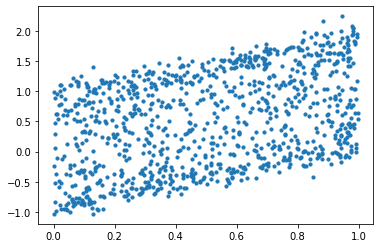

In [38]:
plt.scatter(X[:,0],y,s=10)

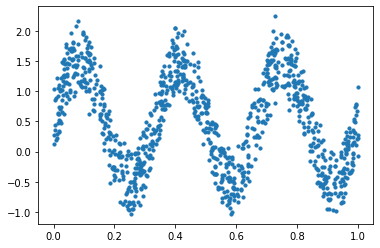

In [39]:
plt.scatter(X[:,1],y,s=10)

### 7. Mutual Information for regression using mutual_info_regression
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is continues in nature

In [40]:
feature_selection.mutual_info_regression(X,y)

array([0.31431334, 0.86235026, 0.        ])

### 8. Mutual Information for classification using mutual_info_classification
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is discrete in nature

In [41]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

In [43]:
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [44]:
cat_cols = list(adult_data.select_dtypes('object').columns)

In [45]:
cat_cols.remove('Salary')

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
for col in cat_cols:
    le = LabelEncoder()
    adult_data[col]  = le.fit_transform(adult_data[col])

In [49]:
adult_data.Salary = le.fit_transform(adult_data.Salary)

In [52]:
adult_data.Salary

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Salary, Length: 32561, dtype: int64

In [50]:
feature_selection.mutual_info_classif(adult_data, adult_data.Salary)

array([0.06748393, 0.01600639, 0.03269563, 0.0683609 , 0.0652685 ,
       0.10660025, 0.06416403, 0.11109909, 0.00656471, 0.02753865,
       0.08081014, 0.03839129, 0.03986535, 0.01013678, 0.55239519])

In [51]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

### 9. SelectKBest
* SelectKBest returns K important features based on above techniques
* Based on configuration, it can use mutual_information or ANOVA or regression based techniques

In [53]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [54]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.f_classif)

In [59]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [60]:
selector.scores_

array([1.88670731e+03, 8.69361605e+01, 2.91559359e+00, 2.06129509e+02,
       4.12009578e+03, 1.34685178e+03, 1.86500322e+02, 2.18764583e+03,
       1.68934788e+02, 1.59310791e+03, 1.70915006e+03, 7.54830452e+02,
       1.81338628e+03, 8.17155711e+00])

In [61]:
data[0]

array([  39,   13,    4,    1,    1, 2174,   40])

In [62]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.mutual_info_classif)

In [63]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [64]:
selector.scores_

array([0.06696808, 0.01705194, 0.03345472, 0.06440567, 0.06502463,
       0.11405575, 0.06337561, 0.11313403, 0.01198421, 0.02689715,
       0.07867995, 0.03601993, 0.04473326, 0.01273025])

In [65]:
data[0]

array([  39,    9,   13,    4,    1,    1, 2174])

### 10. SelectPercentile
* Selecting top features whose importances are in configured parameter
* Default is top 10 percentile

In [69]:
selector = feature_selection.SelectPercentile(percentile=40, score_func=feature_selection.mutual_info_classif)

In [70]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)

In [72]:
selector.scores_

array([0.06811942, 0.01909848, 0.03281058, 0.06289512, 0.0636168 ,
       0.11263664, 0.06312831, 0.11264752, 0.01045835, 0.02915863,
       0.08329266, 0.03911208, 0.04504463, 0.00841832])

In [71]:
data[:5]

array([[  39,   13,    4,    1,    1, 2174],
       [  50,   13,    2,    4,    0,    0],
       [  38,    9,    0,    6,    1,    0],
       [  53,    7,    2,    6,    0,    0],
       [  28,   13,    2,   10,    5,    0]])

### 11. SelectFromModel
* Selecting important features from model weights
* The estimator should support 'feature_importances'

In [73]:
from sklearn.datasets import load_boston

In [74]:
boston = load_boston()

In [75]:
from sklearn.linear_model import LinearRegression

In [77]:
clf = LinearRegression()
sfm = feature_selection.SelectFromModel(clf, threshold=0.25)

In [83]:
updated_data = sfm.fit_transform(boston.data, boston.target)

In [84]:
updated_data

array([[ 0.   ,  0.538,  6.575, ...,  1.   , 15.3  ,  4.98 ],
       [ 0.   ,  0.469,  6.421, ...,  2.   , 17.8  ,  9.14 ],
       [ 0.   ,  0.469,  7.185, ...,  2.   , 17.8  ,  4.03 ],
       ...,
       [ 0.   ,  0.573,  6.976, ...,  1.   , 21.   ,  5.64 ],
       [ 0.   ,  0.573,  6.794, ...,  1.   , 21.   ,  6.48 ],
       [ 0.   ,  0.573,  6.03 , ...,  1.   , 21.   ,  7.88 ]])

In [79]:
boston.data.shape

(506, 13)

### 12. Recursive Feature Elimination
* Uses an external estimator to calculate weights of features
* First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. 
* Then, the least important features are pruned from current set of features. 
* That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [85]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_regression(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
data = selector.fit_transform(X, y)

In [86]:
X.shape

(50, 10)

In [87]:
data.shape

(50, 5)

In [88]:
selector.ranking_

array([1, 1, 4, 3, 1, 6, 1, 2, 5, 1])